In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing model building packages
from sklearn import preprocessing,metrics 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
!unzip '/content/drive/MyDrive/artivatic_challenge/ML_Artivatic_dataset.zip'

Archive:  /content/drive/MyDrive/artivatic_challenge/ML_Artivatic_dataset.zip
   creating: ML_Artivatic_dataset/
  inflating: ML_Artivatic_dataset/sample_submission.csv  
  inflating: ML_Artivatic_dataset/test_indessa.csv  
  inflating: ML_Artivatic_dataset/train_indessa.csv  


In [36]:
train_raw  = pd.read_csv('/content/ML_Artivatic_dataset/train_indessa.csv')
test       = pd.read_csv('/content/ML_Artivatic_dataset/test_indessa.csv')
sub        = pd.read_csv('/content/ML_Artivatic_dataset/sample_submission.csv')

In [26]:
train_raw.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [27]:
train_raw.shape

(532428, 45)

In [28]:
train_raw.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [29]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

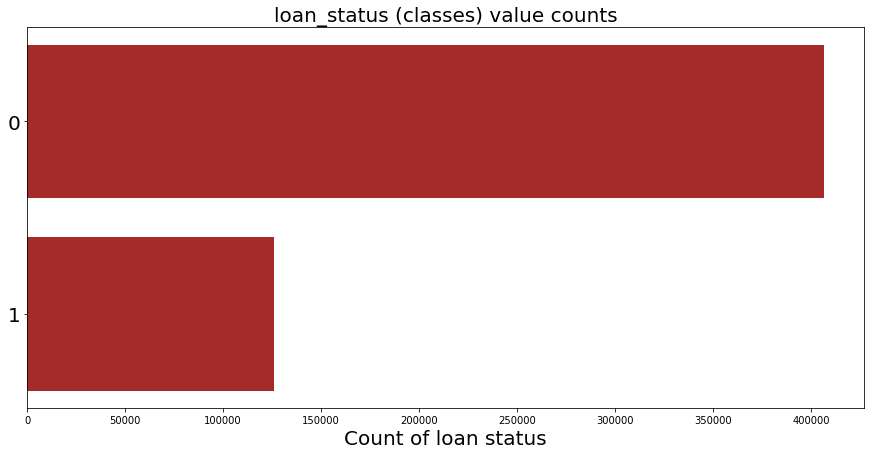

In [30]:
loan_status = train_raw['loan_status'].value_counts().reset_index()
loan_status = loan_status.sort_values(by='loan_status')

ind = np.arange(loan_status.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(15,7))
rects = ax.barh(ind, loan_status.loan_status.values, color='brown')
ax.set_yticks(ind)
ax.set_yticklabels(loan_status.index.values, rotation='horizontal', fontsize=20)
ax.set_xlabel("Count of loan status", fontsize=20)
ax.set_title("loan_status (classes) value counts", fontsize=20)
plt.show()

In [31]:
train_raw.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [32]:
classes = train_raw['loan_status'].value_counts()
non_defaulters = round(classes[0]/train_raw['loan_status'].count()*100,2)
defaulters = round(classes[1]/train_raw['loan_status'].count()*100, 2)
non_defaulters, defaulters

(76.37, 23.63)

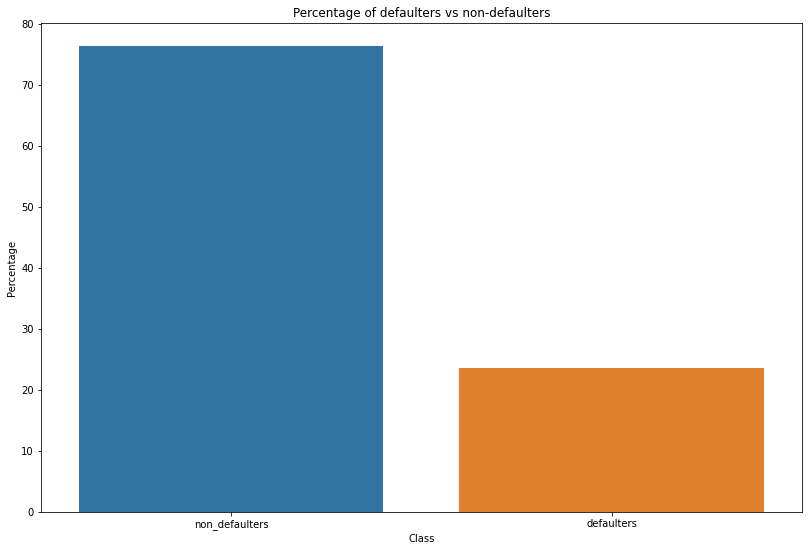

In [33]:
# Create a bar plot for the number and percentage of defaulter vs non-defaulter transcations
plt.figure(figsize=(30,9))

plt.subplot(1,2,2)
fraud_percentage = {'Class':['non_defaulters', 'defaulters'], 'Percentage':[non_defaulters, defaulters]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of defaulters vs non-defaulters')

plt.show()

In [ ]:
print(train_raw['term'].value_counts())
print('--------------------------------------------------------------')
print(train_raw['sub_grade'].value_counts())
print('--------------------------------------------------------------')
print(train_raw['emp_title'].value_counts())
print('--------------------------------------------------------------')
print(train_raw['verification_status'].value_counts())

In [ ]:
# print(train_raw['purpose'].value_counts())
print('--------------------------------------------------------------')
print(train_raw['title'].value_counts())
print('--------------------------------------------------------------')
# print(train_raw['addr_state'].value_counts())
print('--------------------------------------------------------------')
print(train_raw['application_type'].value_counts())

In [37]:
#Data encoding
train_raw['grade']                = train_raw['grade'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
train_raw["home_ownership"]       = train_raw["home_ownership"].replace({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
train_raw["emp_length"]           = train_raw["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':''}, regex = True)
train_raw["emp_length"]           = train_raw["emp_length"].replace(np.nan, 0)
train_raw["emp_length"]           = train_raw["emp_length"].apply(lambda x:int(x))

train_raw['term']                 = train_raw['term'].replace({'36 months':2,'60 months':1})
train_raw["verification_status"]  = train_raw["verification_status"].replace({"Source Verified":3,"Verified":2,"Not Verified":1})

train_raw["purpose"]              = train_raw["purpose"].replace({'debt_consolidation':1
                                                         ,'credit_card':2
                                                         ,'home_improvement':3
                                                         ,'other':4
                                                         ,'major_purchase':5
                                                         ,'small_business':6
                                                         ,'car':7
                                                         ,'medical':8
                                                         ,'moving':9
                                                         ,'vacation':10
                                                         ,'house':11
                                                         ,'wedding':12
                                                         ,'renewable_energy':13
                                                         ,'educational':14})

train_raw["application_type"]      = train_raw["application_type"].replace({'INDIVIDUAL':1,'JOINT':2})

In [38]:
train_raw

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,2,,19.19,3,E3,clerk,9,4,28700.0,3,n,NaN,1,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,1,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,2,BAT1586599,10.99,6,B4,Human Resources Specialist,1,6,65000.0,3,n,NaN,3,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,1,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,2,BAT1586599,7.26,7,A4,Driver,2,4,45000.0,1,n,NaN,1,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,1,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,2,BAT4808022,19.72,4,D5,Us office of Personnel Management,10,5,105000.0,1,n,> My goal is to obtain a loan to pay off my hi...,1,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,1,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,2,BAT2833642,10.64,6,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10,5,52000.0,2,n,NaN,2,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,1,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,2,,12.49,6,B5,Registered Nurse,10,6,75000.0,3,n,NaN,1,Debt consolidation,481xx,MI,14.53,0.0,0.0,NaN,51.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,0.0,NaN,1,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,1,BAT2003848,14.99,5,C5,Account Mgr,10,6,59000.0,1,n,NaN,1,Debt consolidation,496xx,MI,22.97,0.0,0.0,NaN,81.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,0.0,NaN,1,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,1,NaN,20.80,3,E1,Comcast cable,8,5,42504.0,2,n,NaN,1,Debt consolidation,370xx,TN,27.27,0.0,1.0,26.0,NaN,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,0.0,NaN,1,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,1,BAT3193689,16.29,4,D2,Resident Physician,1,5,50000.0,3,n,NaN,2,Credit card refinancing,432xx,OH,14.91,0.0,1.0,NaN,NaN,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,0.0,NaN,1,NaN,78th week,0.0,0.0,29197.0,23300.0,0


<Figure size 432x288 with 0 Axes>

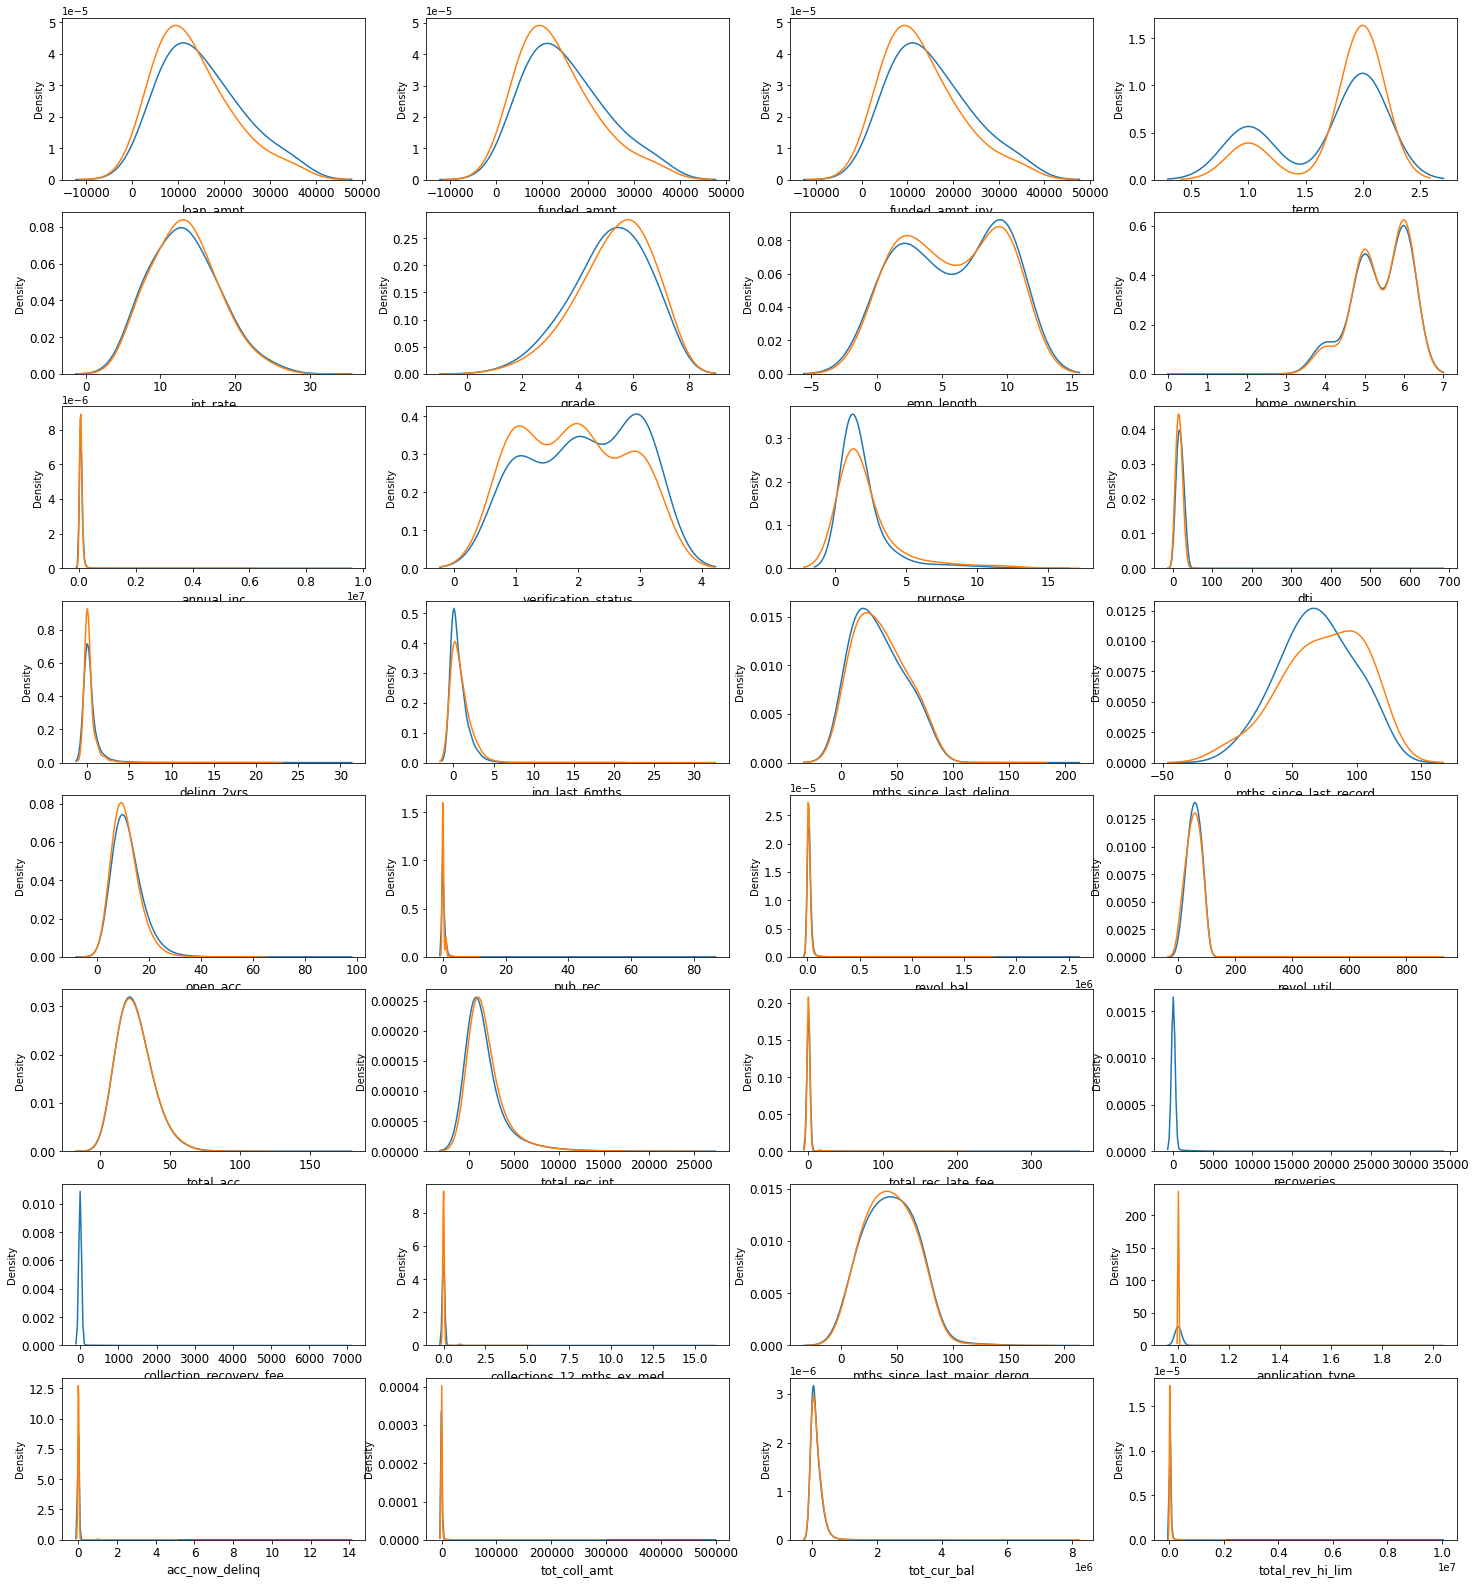

In [40]:
# Plotting numerical variable in displot to visualise the distribution
train_num = train_raw.select_dtypes(include='number')
var = list(train_num.columns.values)
# dropping Class columns from the list
var.remove("loan_status")
var.remove("member_id")

i = 0
t0 = train_raw.loc[train_raw['loan_status'] == 0]
t1 = train_raw.loc[train_raw['loan_status'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(25,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [44]:
train_num.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [45]:
features = ['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']
      
train_df = train_raw[features]

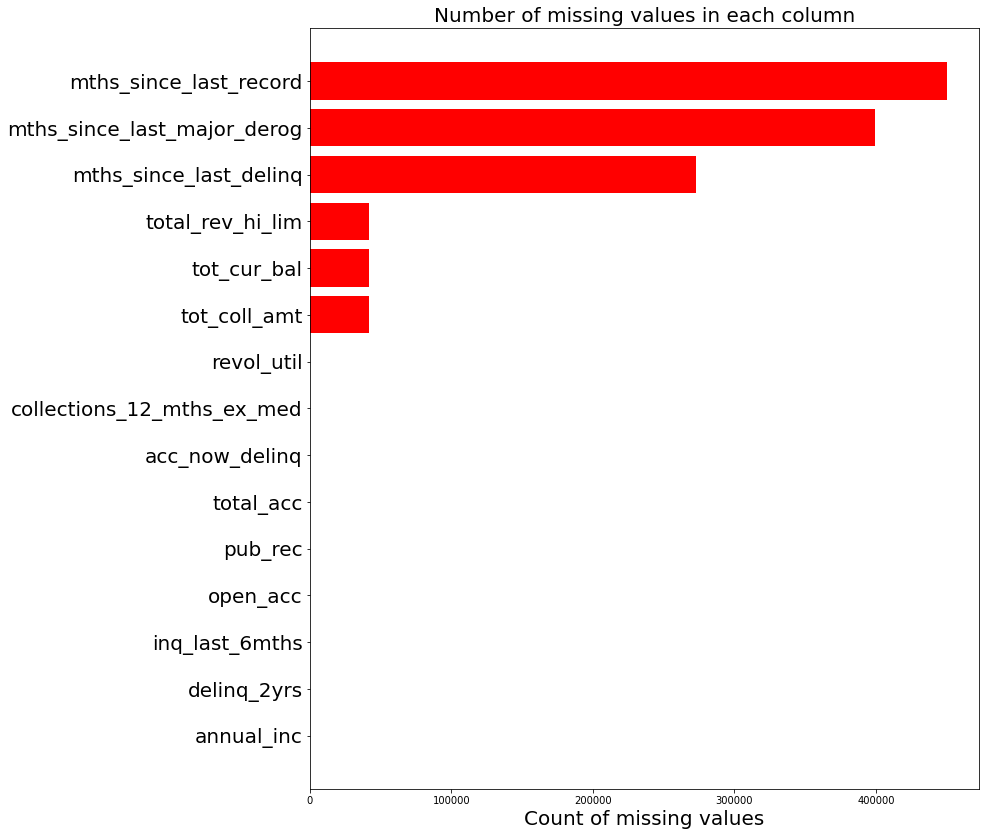

In [46]:
train_nan = train_df.isnull().sum(axis=0).reset_index()
train_nan.columns = ['column_name', 'missing_count']
train_nan = train_nan.loc[train_nan['missing_count']>0]
train_nan = train_nan.sort_values(by='missing_count')

ind = np.arange(train_nan.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,14))
rects = ax.barh(ind, train_nan.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(train_nan.column_name.values, rotation='horizontal', fontsize=20)
ax.set_xlabel("Count of missing values", fontsize=20)
ax.set_title("Number of missing values in each column", fontsize=20)
plt.show()

In [47]:
del_cols = ['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']
train_df = train_df.drop(labels = del_cols, axis = 1)

In [50]:
train_df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,2,19.19,3,9,4,28700.0,3,1,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,1,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,2,10.99,6,1,6,65000.0,3,3,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,1,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,2,7.26,7,2,4,45000.0,1,1,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,1,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,2,19.72,4,10,5,105000.0,1,1,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,1,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,2,10.64,6,10,5,52000.0,2,2,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,1,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,2,12.49,6,10,6,75000.0,3,1,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,2595.45,0.0,0.0,0.0,0.0,1,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,1,14.99,5,10,6,59000.0,1,1,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,2182.92,0.0,0.0,0.0,0.0,1,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,1,20.80,3,8,5,42504.0,2,1,27.27,0.0,1.0,14.0,0.0,12085.0,49.9,26.0,645.32,0.0,0.0,0.0,0.0,1,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,1,16.29,4,1,5,50000.0,3,2,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,4619.79,0.0,0.0,0.0,0.0,1,0.0,0.0,29197.0,23300.0,0


In [48]:
train_df.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        3
verification_status               0
purpose                           0
dti                               0
delinq_2yrs                      16
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
collections_12_mths_ex_med       95
application_type                  0
acc_now_delinq                   16
tot_coll_amt                

In [49]:
train_df.loc[np.isnan(train_df['tot_coll_amt']).index]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,2,19.19,3,9,4,28700.0,3,1,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,1,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,2,10.99,6,1,6,65000.0,3,3,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,1,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,2,7.26,7,2,4,45000.0,1,1,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,1,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,2,19.72,4,10,5,105000.0,1,1,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,1,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,2,10.64,6,10,5,52000.0,2,2,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,1,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,2,12.49,6,10,6,75000.0,3,1,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,2595.45,0.0,0.0,0.0,0.0,1,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,1,14.99,5,10,6,59000.0,1,1,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,2182.92,0.0,0.0,0.0,0.0,1,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,1,20.80,3,8,5,42504.0,2,1,27.27,0.0,1.0,14.0,0.0,12085.0,49.9,26.0,645.32,0.0,0.0,0.0,0.0,1,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,1,16.29,4,1,5,50000.0,3,2,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,4619.79,0.0,0.0,0.0,0.0,1,0.0,0.0,29197.0,23300.0,0


In [51]:
train_df['annual_inc'].fillna((train_df['annual_inc'].mean()), inplace=True)
train_df['delinq_2yrs'].fillna((train_df['delinq_2yrs'].mean()), inplace=True)
train_df['inq_last_6mths'].fillna((train_df['inq_last_6mths'].mean()), inplace=True)
train_df['open_acc'].fillna((train_df['open_acc'].mean()), inplace=True)
train_df['pub_rec'].fillna((train_df['pub_rec'].mean()), inplace=True)
train_df['revol_util'].fillna((train_df['revol_util'].mean()), inplace=True)
train_df['total_acc'].fillna((train_df['total_acc'].mean()), inplace=True)
train_df['collections_12_mths_ex_med'].fillna((train_df['collections_12_mths_ex_med'].mean()), inplace=True)
train_df['acc_now_delinq'].fillna((train_df['acc_now_delinq'].mean()), inplace=True)
train_df['tot_coll_amt'].fillna((train_df['tot_coll_amt'].mean()), inplace=True)
train_df['tot_cur_bal'].fillna((train_df['tot_cur_bal'].mean()), inplace=True)
train_df['total_rev_hi_lim'].fillna((train_df['total_rev_hi_lim'].mean()), inplace=True)

In [52]:
train_df.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
loan_status                   0
dtype: i

In [55]:
train_df.drop(labels=['member_id'], axis=1, inplace=True)

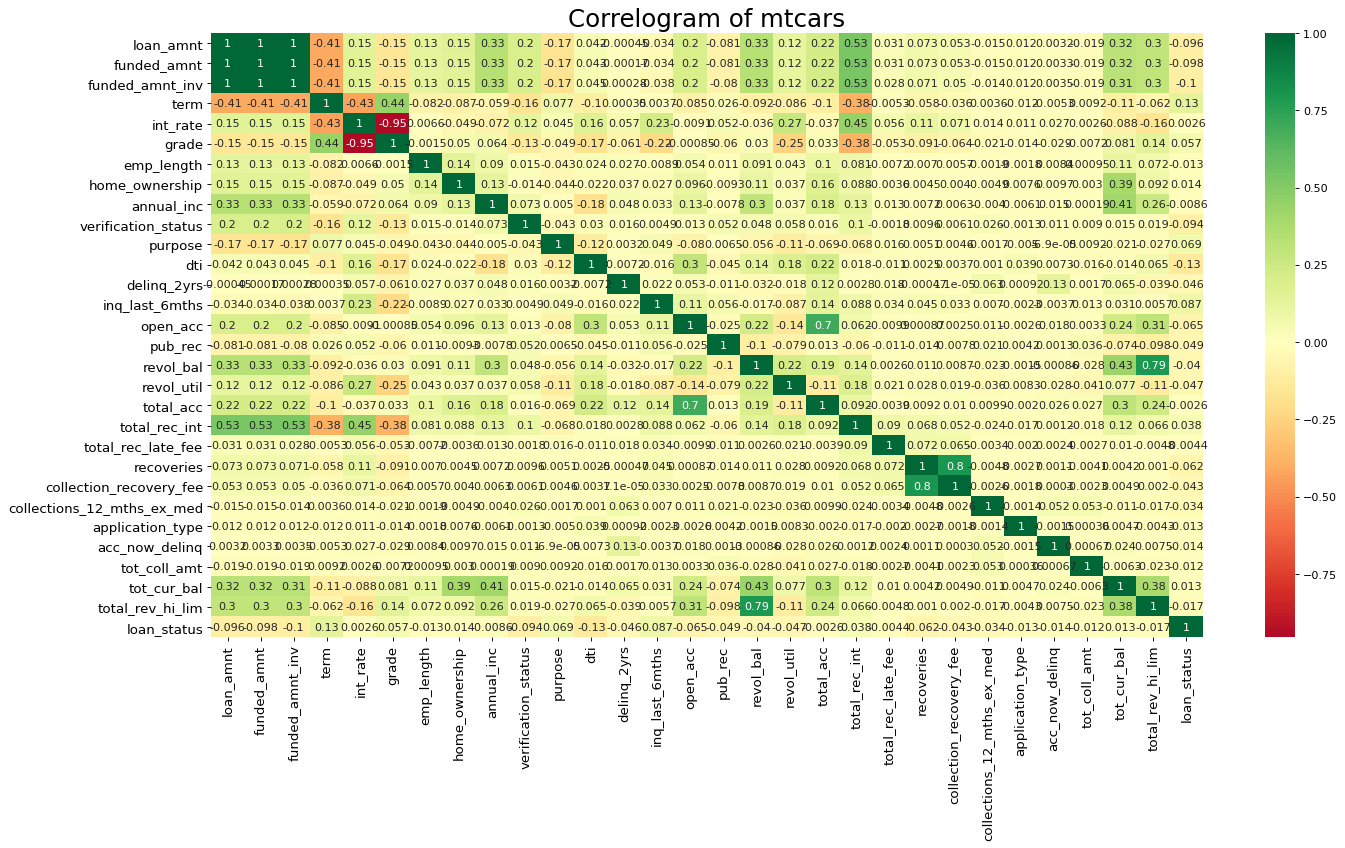

In [56]:
# Plot
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(train_df.corr(), xticklabels=train_df.corr().columns, yticklabels=train_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [57]:
del_cols = ['funded_amnt', 'funded_amnt_inv', 'collection_recovery_fee']
train_df = train_df.drop(labels = del_cols, axis = 1)

In [58]:
std_scl = preprocessing.StandardScaler() #instance of preprocessing
cols = train_df.columns.values[:-1]
train_scl = pd.DataFrame(std_scl.fit_transform(train_df[cols]), columns = cols)
train_scl['loan_status'] = train_df['loan_status']
train_scl['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [59]:
train_scl

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,-0.048325,0.654380,1.357892,-1.678774,0.869615,-2.110320,-0.710585,1.137703,-0.525493,1.880883,-0.365624,0.306313,0.462105,1.379109,0.249461,0.756608,0.230739,-0.276892,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.113614,-0.750447,-0.035064,0
1,-1.180592,0.654380,-0.514423,0.607492,-1.295186,0.904622,-0.153833,1.137703,0.598610,-1.732423,-0.365624,0.306313,-1.044101,-0.333769,-0.414628,-1.335900,-1.035830,-0.797573,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.113614,-0.877208,0.022437,0
2,-0.564070,0.654380,-1.366097,1.369581,-1.024586,-2.110320,-0.460583,-1.311463,-0.525493,0.033604,-0.365624,-0.696686,-1.232377,-0.333769,-0.269555,-1.000428,-0.529203,-0.810702,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.079034,-0.685486,0.077200,0
3,0.028740,0.654380,1.478907,-0.916686,1.140215,-0.602849,0.459668,-1.311463,-0.525493,-0.378628,-0.365624,1.309312,-0.290998,-0.333769,-0.143123,0.018569,-0.360327,1.483468,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.113614,-0.568581,-0.202090,0
4,0.147302,0.654380,-0.594338,0.607492,1.140215,-0.602849,-0.353221,-0.086880,0.036559,0.241512,-0.365624,-0.696686,-0.102722,-0.333769,0.843489,0.886603,0.146301,0.259403,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.113614,-0.625480,0.409418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,0.621549,0.654380,-0.171926,0.607492,1.140215,0.904622,-0.000458,1.137703,-0.525493,-0.431203,-0.365624,-0.696686,0.085554,1.379109,-0.051120,0.358234,0.737366,0.402265,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.113614,-0.382261,-0.199352,0
532424,-0.326946,-1.528163,0.398901,-0.154597,1.140215,0.904622,-0.245858,-1.311463,-0.525493,0.577273,-0.365624,-0.696686,-0.290998,1.379109,-0.333060,-0.082073,0.315177,0.205184,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.113614,0.597473,-0.391022,0
532425,0.470383,-1.528163,1.725504,-1.678774,0.599015,-0.602849,-0.498866,-0.086880,-0.525493,1.091070,-0.365624,0.306313,0.462105,-0.333769,-0.215682,-0.216262,0.061863,-0.529386,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.113614,-0.768651,-0.215781,1
532426,0.740111,-1.528163,0.695732,-0.916686,-1.295186,-0.602849,-0.383896,1.137703,0.036559,-0.385798,-0.365624,0.306313,-0.855825,-0.333769,0.177527,1.452712,-0.951392,1.369369,-0.096529,-0.111603,-0.107519,-0.023941,-0.063387,-0.113614,-0.747076,-0.240424,0


In [63]:
X_train = train_scl.iloc[:,:-1]
y_train    = train_scl.iloc[:,-1]

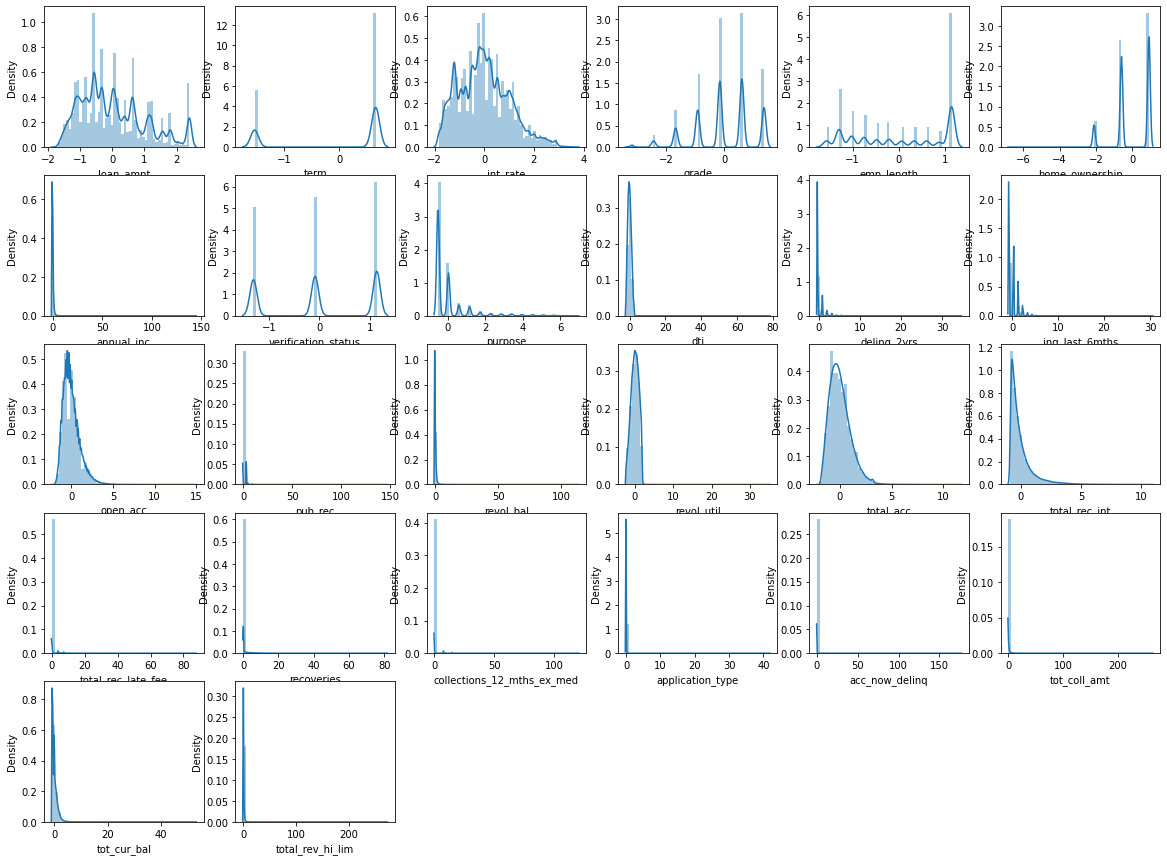

In [64]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [65]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
Skewness,0.68124,-0.873786,0.428453,-0.58171,-0.117099,-0.668919,44.776342,-0.131011,3.037912,1.28974,5.373391,2.034367,1.251532,15.318452,15.980212,-0.089643,0.893208,2.833205,17.685835,18.076004,15.761938,41.745371,27.640826,64.227743,3.138081,80.629224


In [66]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['annual_inc', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object', name='Features')


In [69]:
# Spltting the into 80:20 train test size
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)

In [70]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(425942, 26)
(106486, 26)
(425942,)
(106486,)


In [71]:
from sklearn.preprocessing import PowerTransformer

# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_val[skewed] = pt.transform(X_val[skewed])

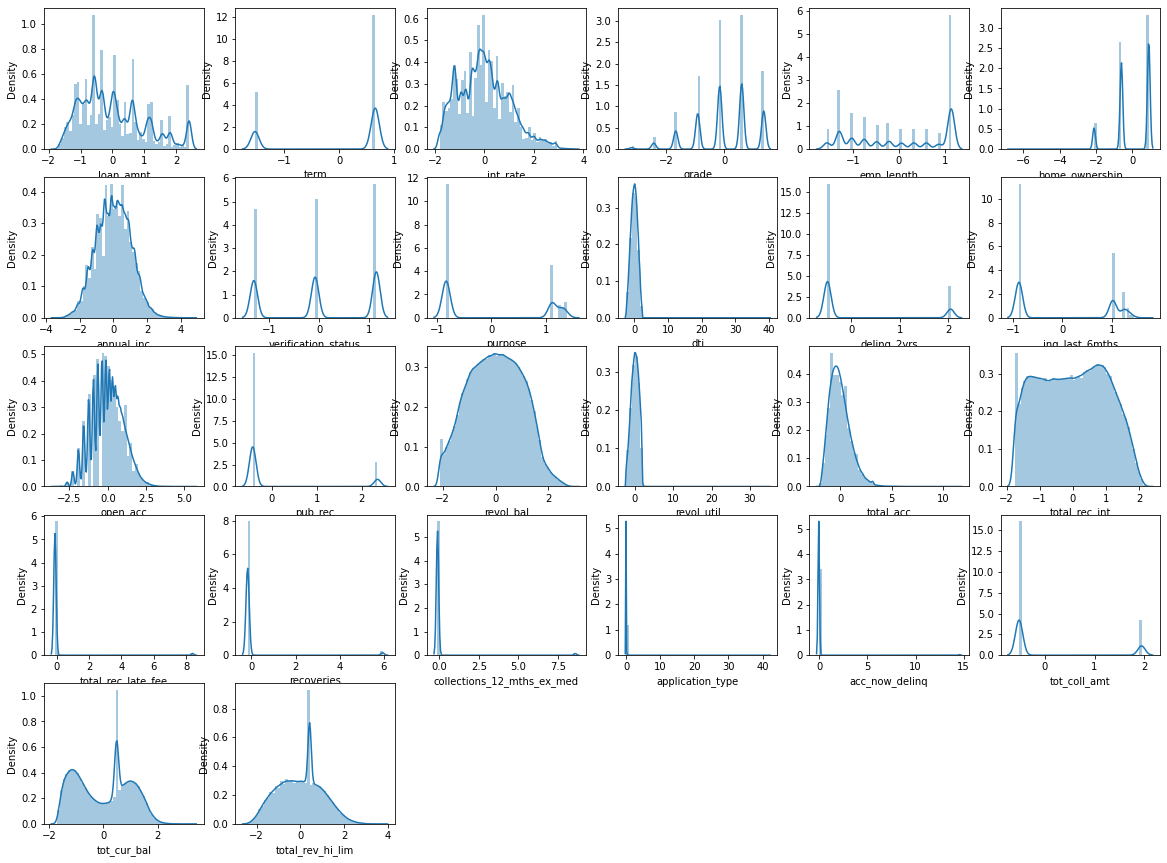

In [72]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

Logistics regression

In [73]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Best ROC AUC score:  0.7684191060713379
Best hyperparameters:  {'C': 1000}


In [74]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.035542,0.177835,0.051109,0.001998,0.01,{'C': 0.01},0.766728,0.769819,0.766819,0.768852,0.769073,0.768258,0.001254,6,0.768663,0.768080,0.768639,0.768240,0.768227,0.768370,0.000236
1,3.625571,0.268627,0.050109,0.000952,0.1,{'C': 0.1},0.766908,0.769975,0.766972,0.768991,0.769185,0.768406,0.001242,5,0.768814,0.768229,0.768784,0.768390,0.768374,0.768518,0.000236
2,3.850564,0.201384,0.054118,0.005609,1,{'C': 1},0.766922,0.769988,0.766986,0.769001,0.769194,0.768418,0.001241,3,0.768826,0.768241,0.768797,0.768400,0.768386,0.768530,0.000237
3,3.959611,0.097204,0.051404,0.001525,10,{'C': 10},0.766923,0.769988,0.766982,0.769002,0.769195,0.768418,0.001242,2,0.768827,0.768240,0.768793,0.768401,0.768388,0.768530,0.000236
4,4.421170,0.165389,0.052570,0.004479,100,{'C': 100},0.766924,0.769990,0.766983,0.769000,0.769194,0.768418,0.001241,4,0.768827,0.768242,0.768794,0.768399,0.768386,0.768530,0.000236
5,4.529080,0.450564,0.050037,0.008566,1000,{'C': 1000},0.766923,0.769990,0.766982,0.769005,0.769195,0.768419,0.001242,1,0.768827,0.768243,0.768794,0.768403,0.768388,0.768531,0.000235


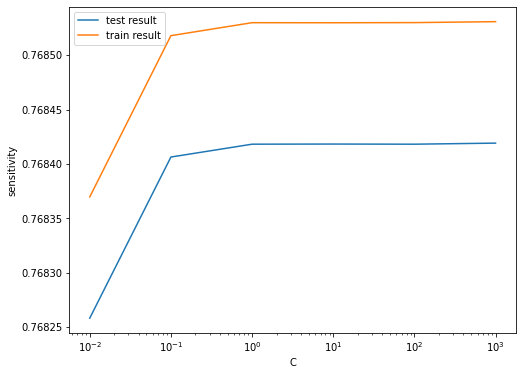

In [76]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [77]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

In [80]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")


In [81]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [82]:
display_scores(y_train, y_train_pred)

F1 Score: 38.75%
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88    325172
           1       0.66      0.27      0.39    100770

    accuracy                           0.80    425942
   macro avg       0.74      0.62      0.63    425942
weighted avg       0.77      0.80      0.76    425942



In [83]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

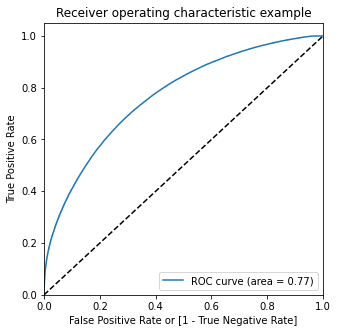

In [85]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [88]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_val)
display_scores(y_val, y_test_pred)

F1 Score: 38.88%
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88     81429
           1       0.67      0.27      0.39     25057

    accuracy                           0.80    106486
   macro avg       0.74      0.62      0.63    106486
weighted avg       0.78      0.80      0.76    106486



In [90]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_val)[:,1]

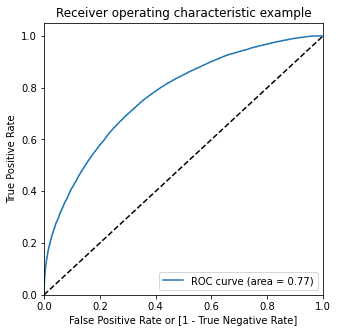

In [91]:
# Plot the ROC curve
draw_roc(y_val, y_test_pred_proba)

Decision Tree

In [92]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   53.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [93]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.905904,0.016357,0.083138,0.000548,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.741822,0.743625,0.746311,0.743919,0.001844,7
1,2.950114,0.047434,0.091846,0.004988,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.741822,0.743625,0.746311,0.743919,0.001844,7
2,2.914979,0.033190,0.084109,0.001795,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.741822,0.743631,0.746327,0.743927,0.001851,5
3,2.942082,0.007287,0.085497,0.002558,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.741822,0.743631,0.746327,0.743927,0.001851,5
4,5.582004,0.048890,0.104521,0.004845,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.798886,0.794900,0.791819,0.795202,0.002893,4
5,5.498544,0.077261,0.101146,0.004610,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.798889,0.794902,0.791816,0.795202,0.002895,3
6,5.445848,0.014457,0.098279,0.000643,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.799567,0.795001,0.792319,0.795629,0.002992,1
7,5.474842,0.002135,0.098424,0.006402,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.799569,0.794928,0.792319,0.795605,0.002998,2


In [94]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.7956292247126161
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [95]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [96]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 47.06%
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90    325172
           1       0.86      0.32      0.47    100770

    accuracy                           0.83    425942
   macro avg       0.84      0.65      0.68    425942
weighted avg       0.83      0.83      0.80    425942



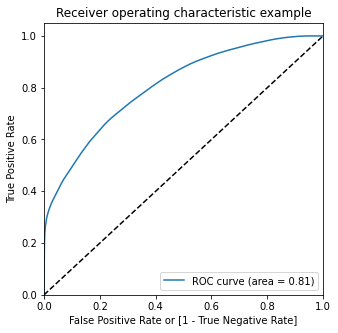

In [97]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [98]:
y_test_pred = dt_imb_model.predict(X_val)
display_scores(y_val, y_test_pred)

F1 Score: 46.8%
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     81429
           1       0.85      0.32      0.47     25057

    accuracy                           0.83    106486
   macro avg       0.84      0.65      0.68    106486
weighted avg       0.83      0.83      0.80    106486



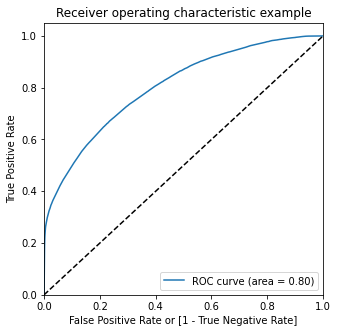

In [99]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_val)[:,1]

# Plot the ROC curve
draw_roc(y_val, y_test_pred_proba)

Xgboost

In [100]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 14.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [101]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,46.048042,0.447538,0.785195,0.010004,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.839117,0.840059,0.840560,0.839912,0.000598,4,0.842841,0.840895,0.841805,0.841847,0.000795
1,50.542723,0.245257,0.766848,0.004898,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.840647,0.837886,0.840725,0.839753,0.001320,5,0.844417,0.839474,0.842138,0.842010,0.002020
2,45.731957,0.162037,0.772127,0.003102,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.836618,0.838266,0.838878,0.837920,0.000954,6,0.840171,0.839385,0.840472,0.840009,0.000458
3,45.062526,0.155035,0.747006,0.006216,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.868010,0.870541,0.867732,0.868761,0.001264,3,0.872559,0.872882,0.871343,0.872261,0.000663
4,50.313944,0.058708,0.751401,0.008395,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.871123,0.872261,0.872186,0.871857,0.000520,2,0.875599,0.874125,0.874529,0.874751,0.000622
5,45.161530,0.244336,0.743776,0.003634,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.872226,0.872627,0.871905,0.872252,0.000295,1,0.876599,0.875043,0.874100,0.875247,0.001031


In [102]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.8722524564742932
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [103]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [104]:
# Printing best params
params = {'learning_rate':  0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [105]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 41.74%
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89    325172
           1       0.89      0.27      0.42    100770

    accuracy                           0.82    425942
   macro avg       0.85      0.63      0.66    425942
weighted avg       0.83      0.82      0.78    425942



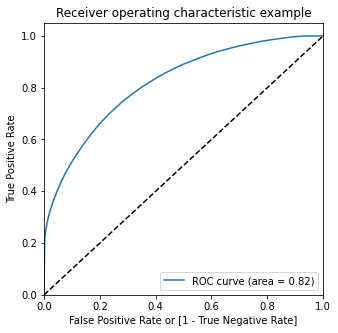

In [106]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [107]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_val)
display_scores(y_val, y_test_pred)

F1 Score: 41.71%
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.89     81429
           1       0.89      0.27      0.42     25057

    accuracy                           0.82    106486
   macro avg       0.85      0.63      0.66    106486
weighted avg       0.83      0.82      0.78    106486



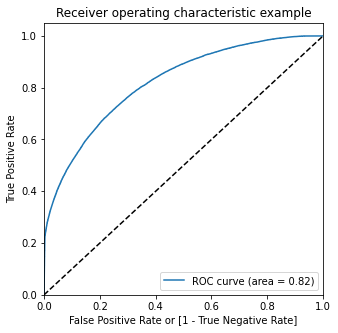

In [108]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_val)[:,1]

# Plot the ROC curve
draw_roc(y_val, y_test_pred_proba)

In [109]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.8188364201762577
Threshold= 0.2290557


Random Oversampling

In [110]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [111]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 325172, 1: 100770})
New class distribution:- Counter({0: 325172, 1: 325172})


Decision Tree with Random Oversampling

In [112]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [113]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.8050276947011961
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [114]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [115]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 71.46%
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72    325172
           1       0.72      0.71      0.71    325172

    accuracy                           0.72    650344
   macro avg       0.72      0.72      0.72    650344
weighted avg       0.72      0.72      0.72    650344



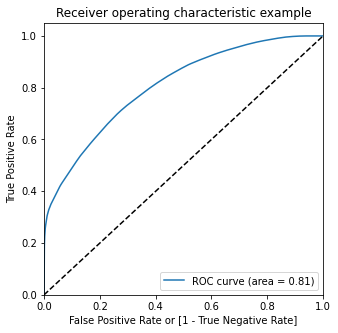

In [116]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [137]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_val)
display_scores(y_val, y_test_pred)

F1 Score: 54.46%
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80     81429
           1       0.45      0.70      0.54     25057

    accuracy                           0.73    106486
   macro avg       0.67      0.72      0.67    106486
weighted avg       0.78      0.73      0.74    106486



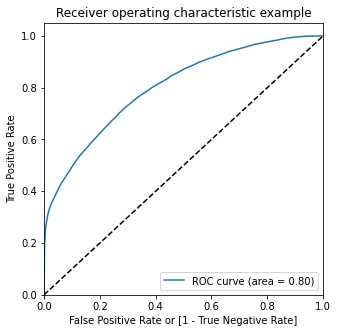

In [138]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_val)[:,1]
# Plot the ROC curve
draw_roc(y_val, y_test_pred_proba)

XGBoost with Random Oversampling

In [119]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 23.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [120]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,71.870841,0.552409,1.188798,0.019157,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.839109,0.840044,0.841824,0.840326,0.001126,5,0.840693,0.840421,0.842058,0.841057,0.000716
1,81.135482,0.407670,1.169275,0.014341,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.839975,0.839800,0.840025,0.839933,0.000097,6,0.841607,0.840021,0.840721,0.840783,0.000649
2,71.520996,0.378995,1.151253,0.008440,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.839816,0.841514,0.842717,0.841349,0.001190,4,0.841575,0.841988,0.843153,0.842238,0.000668
3,71.718991,0.688574,1.133252,0.020169,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.873692,0.873525,0.875641,0.874286,0.000961,2,0.876081,0.874390,0.876514,0.875662,0.000917
4,80.351865,0.360267,1.121930,0.022755,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.871735,0.874738,0.875024,0.873832,0.001487,3,0.874159,0.875032,0.875930,0.875040,0.000723
5,72.740897,0.599165,1.116133,0.011244,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.873065,0.875946,0.875828,0.874946,0.001331,1,0.875408,0.876521,0.876744,0.876224,0.000584


In [121]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.8749461563308231
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [122]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [123]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [124]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 72.19%
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.78      0.75    325172
           1       0.76      0.69      0.72    325172

    accuracy                           0.74    650344
   macro avg       0.74      0.74      0.73    650344
weighted avg       0.74      0.74      0.73    650344



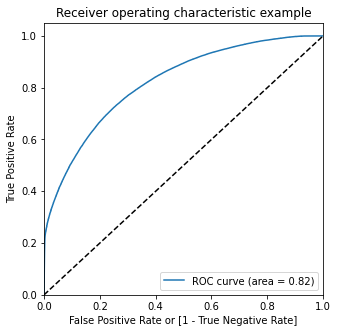

In [125]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

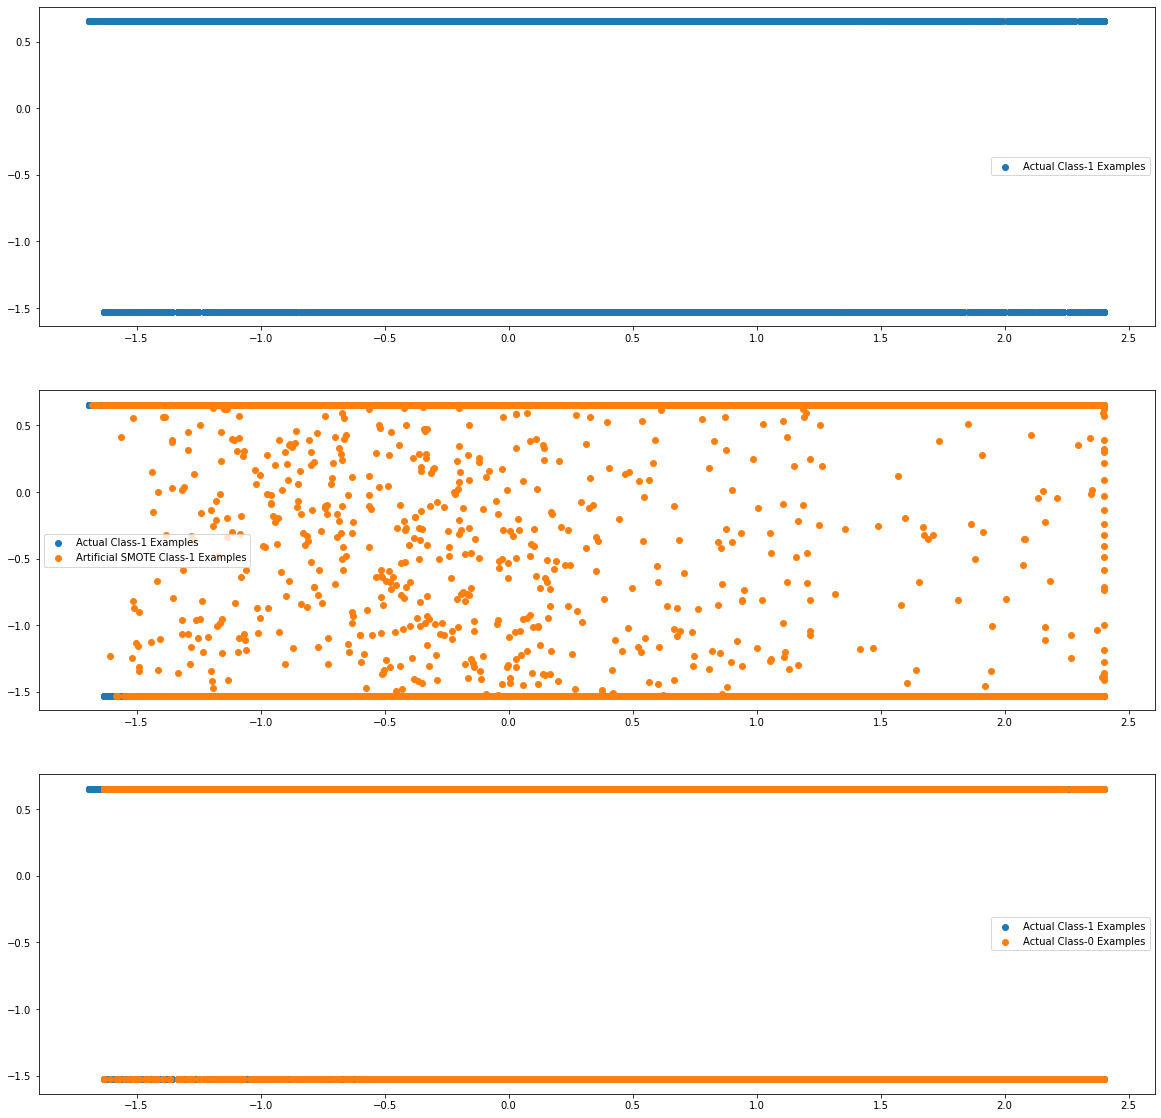

In [141]:
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

Decision Tree on balanced data with SMOTE

In [142]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [143]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.8332391011091708
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [144]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [145]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [146]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 75.02%
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.84      0.78    325172
           1       0.81      0.70      0.75    325172

    accuracy                           0.77    650344
   macro avg       0.77      0.77      0.77    650344
weighted avg       0.77      0.77      0.77    650344



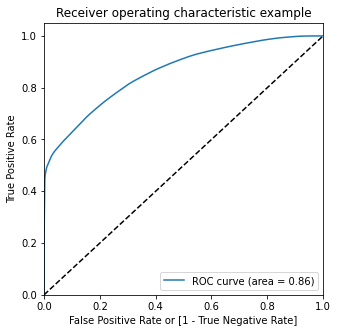

In [147]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [148]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_val)
display_scores(y_val, y_pred)

F1 Score: 50.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84     81429
           1       0.49      0.51      0.50     25057

    accuracy                           0.76    106486
   macro avg       0.67      0.67      0.67    106486
weighted avg       0.76      0.76      0.76    106486



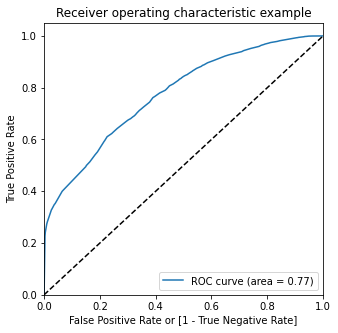

In [149]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_val)[:,1]
# Plot the ROC curve
draw_roc(y_val, y_test_pred_smote)

XGBoost on balanced data with SMOTE

In [150]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 27.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [151]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,83.589990,1.278576,0.934724,0.097845,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.788404,0.953829,0.960359,0.900864,0.079566,3,0.938470,0.889547,0.897671,0.908562,0.021406
1,95.528952,2.048272,0.977620,0.110806,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.781675,0.957105,0.969344,0.902708,0.085729,1,0.951235,0.895221,0.901619,0.916025,0.025034
2,90.416392,3.082349,0.962702,0.096483,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.785700,0.954000,0.964282,0.901328,0.081868,2,0.952108,0.892198,0.899106,0.914471,0.026762
3,82.981898,1.717621,0.811828,0.035082,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.778692,0.952826,0.969320,0.900279,0.086239,4,0.964915,0.890442,0.903513,0.919623,0.032467
4,96.452943,2.105805,0.795132,0.049957,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.778850,0.959962,0.951597,0.896803,0.083475,6,0.964494,0.896034,0.890043,0.916857,0.033773
5,91.769139,3.511642,0.765885,0.043321,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.786798,0.960440,0.951603,0.899614,0.079854,5,0.975727,0.897754,0.888853,0.920778,0.039024


In [152]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9027080688863757
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [153]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [154]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [155]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 80.63%
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83    325172
           1       0.87      0.75      0.81    325172

    accuracy                           0.82    650344
   macro avg       0.83      0.82      0.82    650344
weighted avg       0.83      0.82      0.82    650344



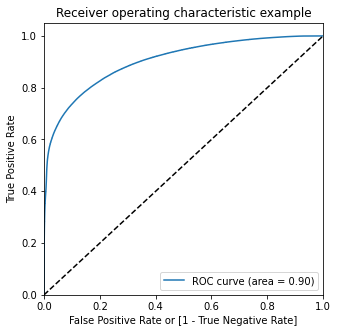

In [156]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

ADASYN (Adaptive Synthetic Sampling)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


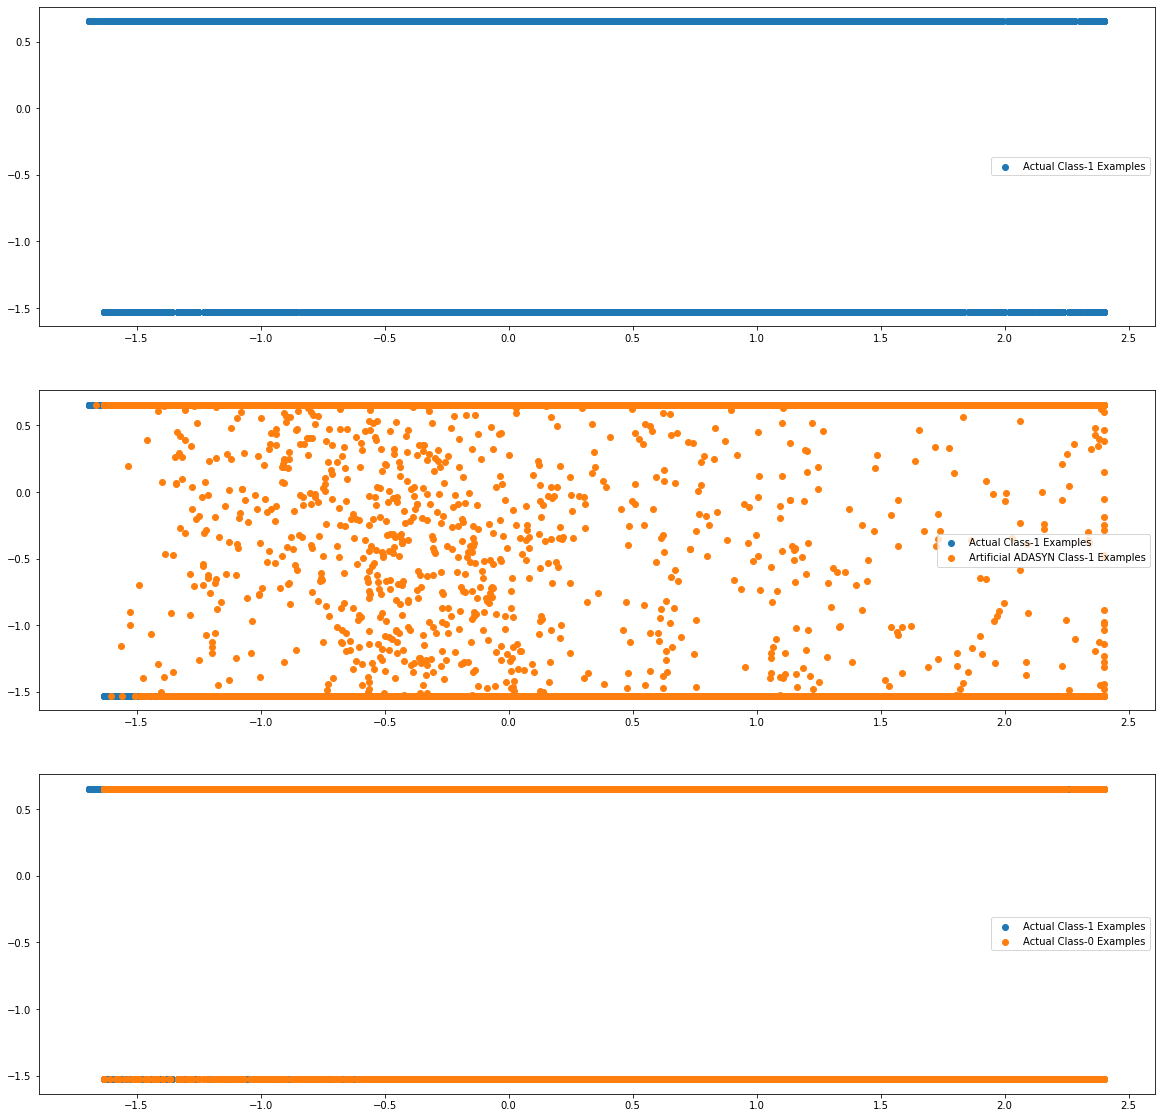

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [162]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 25.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [163]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,76.653087,1.173946,0.951951,0.076012,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.737643,0.935268,0.959476,0.877462,0.099360,4,0.935439,0.881767,0.895319,0.904175,0.022789
1,88.997508,2.566206,0.948286,0.074055,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.740312,0.946580,0.953411,0.880101,0.098885,3,0.930440,0.887270,0.891896,0.903202,0.019353
2,84.151678,2.764149,0.938656,0.095292,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.742678,0.957783,0.947100,0.882520,0.098980,2,0.944795,0.895408,0.888253,0.909485,0.025138
3,77.271919,1.745072,0.812382,0.053786,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.735015,0.951734,0.967560,0.884770,0.106089,1,0.969357,0.891210,0.902770,0.921112,0.034439
4,89.870337,1.935828,0.795242,0.041156,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.736035,0.937886,0.950976,0.874966,0.098384,5,0.967857,0.882959,0.890715,0.913844,0.038324
5,83.881207,3.174560,0.769014,0.016609,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.733657,0.933844,0.934817,0.867439,0.094599,6,0.956711,0.880486,0.878628,0.905275,0.036379


In [164]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.8847696540219996
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)


In [165]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [166]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [167]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 80.65%
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82    325172
           1       0.85      0.77      0.81    325070

    accuracy                           0.82    650242
   macro avg       0.82      0.82      0.82    650242
weighted avg       0.82      0.82      0.82    650242



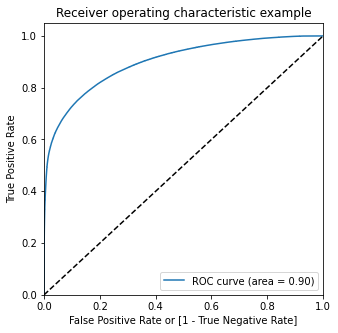

In [168]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Top var = 5
2nd Top var = 12
3rd Top var = 11


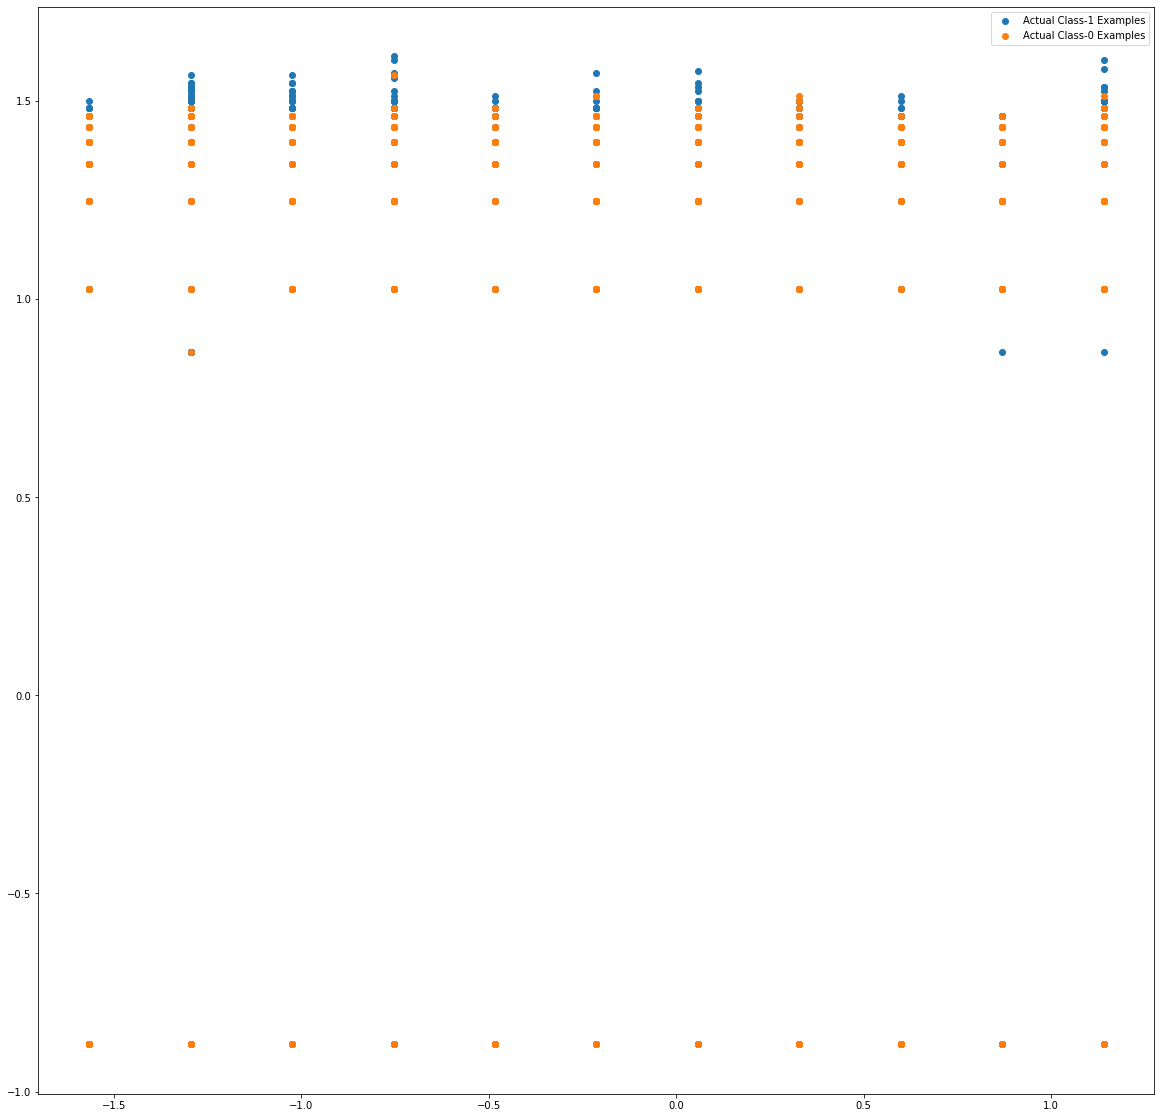

In [170]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [171]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.8992927251804038
0.5087412
